In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
#from model import train_keras_model
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from PIL import Image

#### Import data and train model

In [8]:
from mnist import MNIST

mnist = MNIST('MNIST')
x_train, y_train = mnist.load_training() # 60000 samples
x_test, y_test = mnist.load_testing() # 10000 samples

In [9]:
x_train = np.asarray(x_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.int32)
x_test = np.asarray(x_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.int32)

In [21]:
x_train.reshape(len(x_train), 28, 28, 1).shape

(60000, 28, 28, 1)

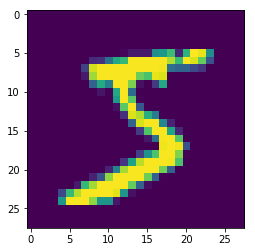

In [10]:
plt.imshow(x_train[0].reshape(28, 28))

In [44]:
from model import train_keras_conv, train_keras_ann

model = train_keras_ann(x_train, y_train, 20)
#model = train_keras_conv(x_train.reshape(len(x_train), 28, 28, 1), y_train, 5)

Epoch 1/20
60000/60000 [==============================] - 3s 54us/step - loss: 13.9407 - accuracy: 0.0576
Epoch 2/20
60000/60000 [==============================] - 3s 50us/step - loss: 13.9416 - accuracy: 0.0955
Epoch 3/20
60000/60000 [==============================] - 3s 51us/step - loss: 13.9414 - accuracy: 0.0768
Epoch 4/20
60000/60000 [==============================] - 3s 50us/step - loss: 13.9407 - accuracy: 0.0192
Epoch 5/20
60000/60000 [==============================] - 3s 50us/step - loss: 13.9392 - accuracy: 0.0228
Epoch 6/20
60000/60000 [==============================] - 3s 50us/step - loss: 13.9351 - accuracy: 0.0401
Epoch 7/20
60000/60000 [==============================] - 3s 50us/step - loss: 13.9302 - accuracy: 0.0432
Epoch 8/20
60000/60000 [==============================] - 3s 50us/step - loss: 13.9299 - accuracy: 0.0396
Epoch 9/20
60000/60000 [==============================] - 4s 58us/step - loss: 13.9295 - accuracy: 0.0412
Epoch 10/20
60000/60000 [=====================

### Evaluate model

In [40]:
"""loss_and_metrics = model.evaluate(x_test.reshape(len(x_test), 28, 28, 1), y_test, batch_size=32)
classes = model.predict_classes(x_test.reshape(len(x_test), 28, 28, 1), batch_size=32)
proba = model.predict_proba(x_test.reshape(len(x_test), 28, 28, 1), batch_size=32)"""
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
classes = model.predict_classes(x_test, batch_size=32)
proba = model.predict_proba(x_test, batch_size=32)

10000/10000 [==============================] - 0s 23us/step


In [41]:
loss_and_metrics

[13.797166934204101, 0.0010999999940395355]

In [42]:
classes[:100]

array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 9, 9, 9, 9, 9, 9, 9, 6, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

In [43]:
y_test[:100]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9], dtype=int32)